<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None
             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  17

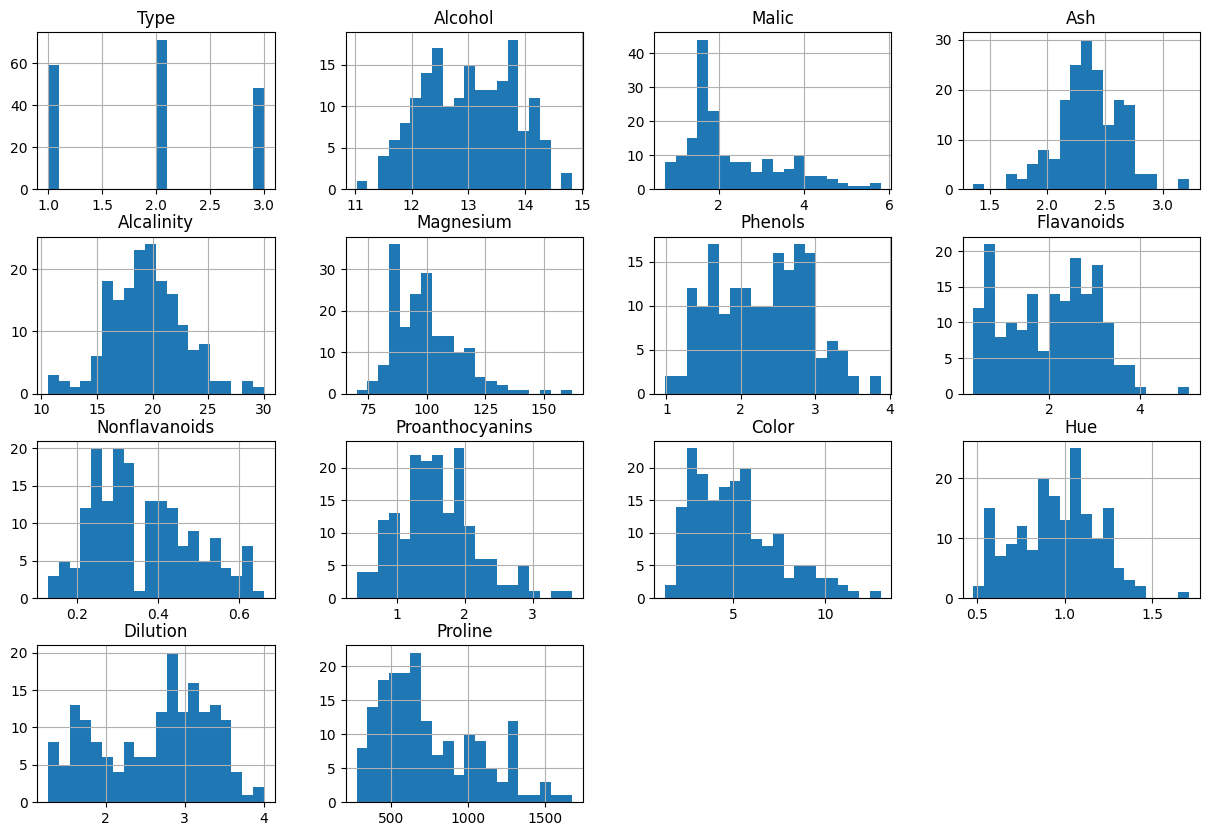

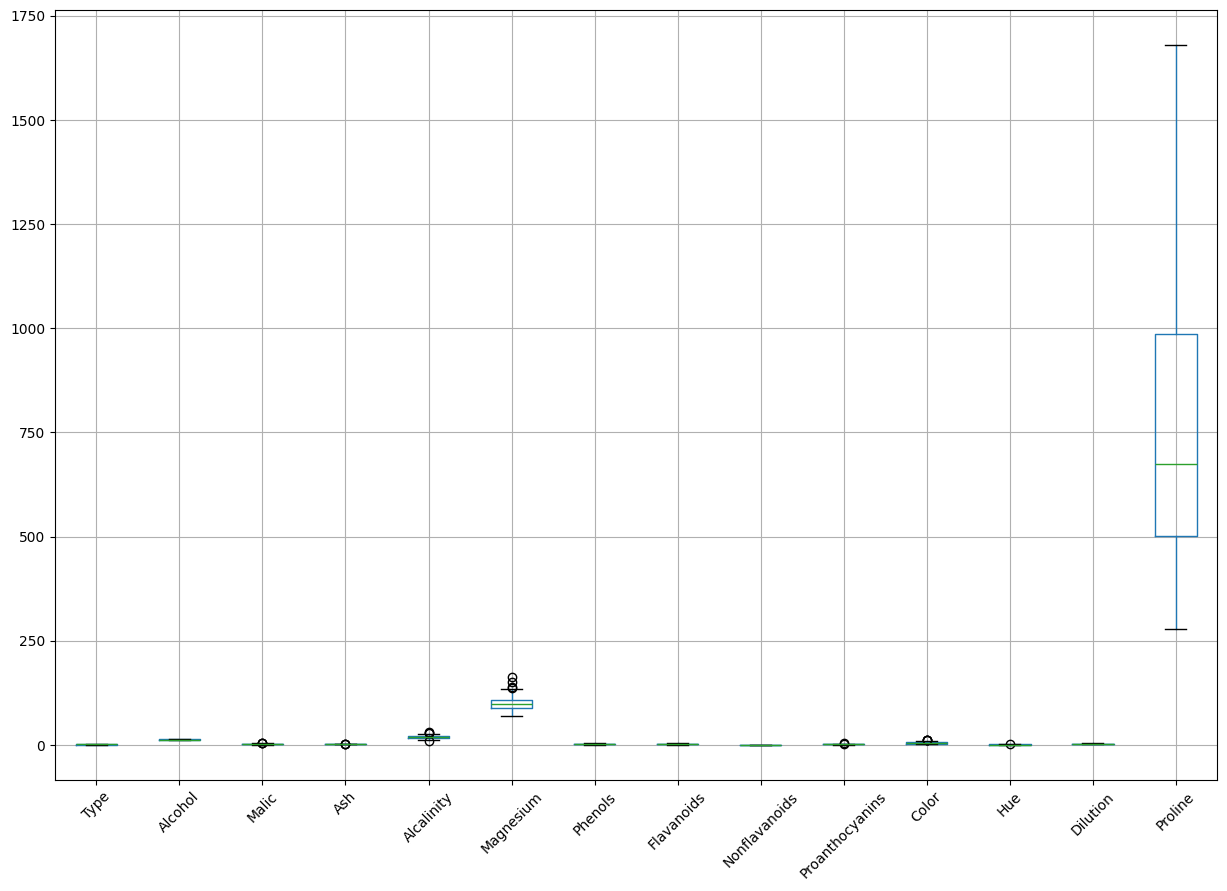

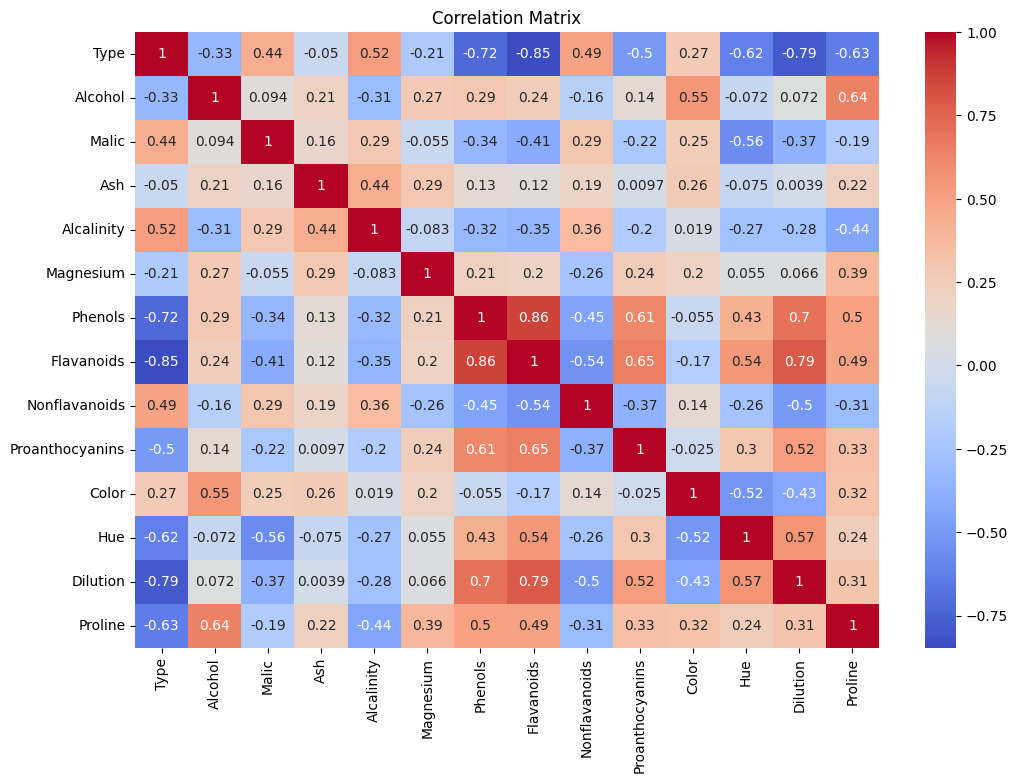

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/wine.csv")
print(df.info())
print(df.describe())
# Visualize distributions
df.hist(bins=20, figsize=(15, 10))
plt.show()
# Box plot
df.boxplot(figsize=(15, 10), rot=45)
plt.show()
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


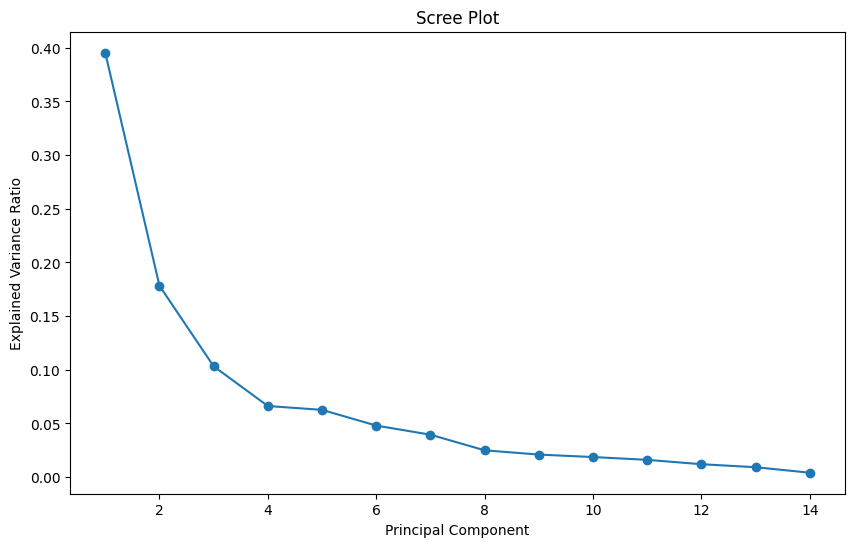

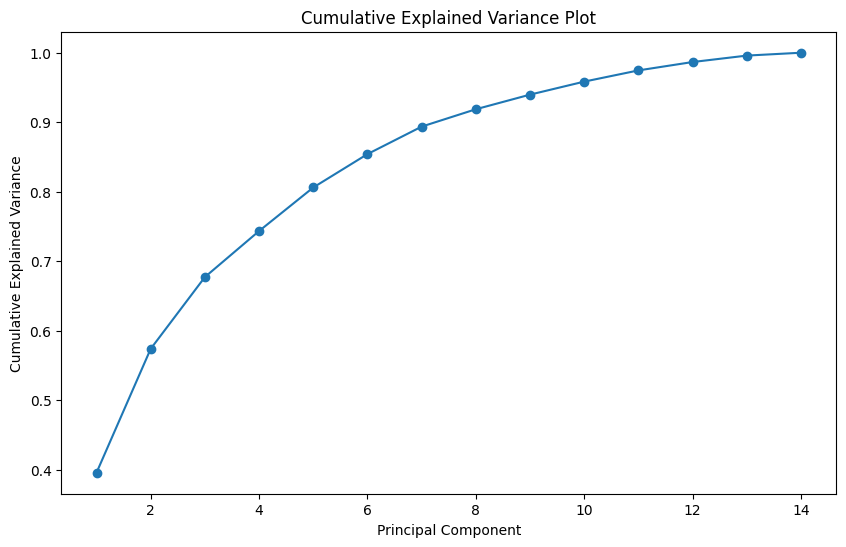

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Standardize the dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
# Perform PCA
pca = PCA()
pca.fit(df_scaled)
# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.show()
# Cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance Plot")
plt.show()
# Transform data
optimal_components = 2
pca = PCA(n_components=optimal_components)
df_pca = pca.fit_transform(df_scaled)


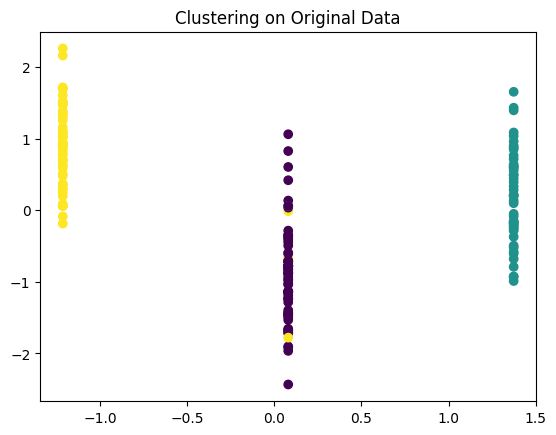

Silhouette Score (Original Data): 0.30648398324833453


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_original = kmeans.fit_predict(df_scaled)
# Visualize clusters
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=clusters_original, cmap="viridis")
plt.title("Clustering on Original Data")
plt.show()
# Evaluate clustering
sil_score_original = silhouette_score(df_scaled, clusters_original)
print(f"Silhouette Score (Original Data): {sil_score_original}")


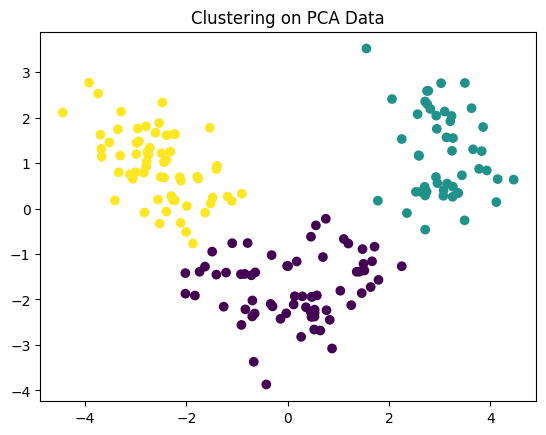

Silhouette Score (PCA Data): 0.6024415520362845


In [ ]:
# Apply K-Means on PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(df_pca)
# Visualize clusters
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters_pca, cmap="viridis")
plt.title("Clustering on PCA Data")
plt.show()
# Evaluate clustering
sil_score_pca = silhouette_score(df_pca, clusters_pca)
print(f"Silhouette Score (PCA Data): {sil_score_pca}")
